In [1]:
## Mapear e clicar para obter as figuras
import pandas as pd
import numpy as np
import pytesseract
from PIL import Image
import time
import pyautogui  

print('Posicione o cursor em ESC')
time.sleep(4) # tempo de alguns segundos para posicionar o cursor nas teclas
# é preciso definir as posições das teclas: Esc, Tracce(6), MaxHold, Clr/Wr

# posicionar cursor no esc
esc = pyautogui.position()   # para saber onde deve clicar no field fox
print(esc)

print('Posicione o cursor em Trace (6)')
time.sleep(4)
# posicionar cursor no Trace
trace = pyautogui.position()   # para saber onde deve clicar no field fox
print(trace)

print('Posicione o cursor em MaxHold')
time.sleep(4)
# posicionar cursor no MaxHold
maxhold = pyautogui.position()   # para saber onde deve clicar no field fox
print(maxhold)


# posicionar cursor no MaxHold
state = maxhold   # para saber onde deve clicar no field fox
#print(state)

print('Posicione o cursor em Clr/Wr')
time.sleep(4)
# posicionar cursor no clear
clr = pyautogui.position()   # para saber onde deve clicar no field fox
print(clr)


print('Posicione o cursor em Tools')
time.sleep(4)
tools = pyautogui.position()   # para saber onde deve clicar no field fox
print(tools)

print('Posicione o cursor em Save Screen To PNG')
time.sleep(4)
save = pyautogui.position()   # para saber onde deve clicar no field fox
print(save)



Posicione o cursor em ESC
Point(x=500, y=681)
Posicione o cursor em Trace (6)
Point(x=410, y=597)
Posicione o cursor em MaxHold
Point(x=213, y=510)
Posicione o cursor em Clr/Wr
Point(x=130, y=511)
Posicione o cursor em Tools
Point(x=222, y=46)
Posicione o cursor em Save Screen To PNG
Point(x=244, y=87)


## Field fox com visor em outdor sun: System; display; display colors; outdoor sun

In [ ]:
#### tirar print de tempo em tempo da tela do osciloscópio
import time
import serial
import pyautogui 
import math
# para detectar o start do modo automatico

ser = serial.Serial('COM4', baudrate = 9600, timeout=1)
step = 360
grau = list(range(0,step))


while 1:

    arduinoData = ser.readline()
    print(arduinoData)

    if arduinoData == b'1\r\n':
                
        for k in range (0,step):
            
            if k==0:
                
                inicio = time.time()
                time.sleep(1)
                pyautogui.click(esc)
                time.sleep(1)
                pyautogui.click(trace) 
                time.sleep(1)
                pyautogui.click(state) 
                time.sleep(1)
                pyautogui.click(maxhold)  # ativa max hold
                time.sleep(1)
            
                pyautogui.click(tools)  
                time.sleep(1)
                pyautogui.click(save)  
                time.sleep(2)
            
                grau[k] = k # para salvar o vetor de angulos e criar a tabela
                k2 = str(k)
            
                if k >= 100:
                    pyautogui.write(k2) #print da medida            
                elif k>=10:
                    pyautogui.write('0' + k2) #print da medida     
                elif k<10:
                    pyautogui.write('00' + k2) #print da medida
                  
                time.sleep(1)            
                pyautogui.press('enter')            
                time.sleep(1)
                pyautogui.click(state) 
                time.sleep(1)
                pyautogui.click(clr) # desativa maxhold
                time.sleep(1)          
                fim = time.time()
                tt = fim-inicio
                print(tt)
                arduinoData = ser.readline().decode('ascii')
                diferenca=tt-(float(arduinoData)/1000) 
                print(abs(diferenca))
                time.sleep(abs(diferenca))
                
                
            if k!=0:
                
                inicio = time.time()
                time.sleep(1)
                pyautogui.click(state) 
                time.sleep(1)
                pyautogui.click(maxhold)  # ativa max hold
                time.sleep(1)
            
                pyautogui.click(tools)  
                time.sleep(1)
                pyautogui.click(save)  
                time.sleep(2)
            
                grau[k] = k # para salvar o vetor de angulos e criar a tabela
                k2 = str(k)
            
                if k >= 100:
                    pyautogui.write(k2) #print da medida            
                elif k>=10:
                    pyautogui.write('0' + k2) #print da medida     
                elif k<10:
                    pyautogui.write('00' + k2) #print da medida
                  
                time.sleep(1)            
                pyautogui.press('enter')            
                time.sleep(1)
                pyautogui.click(state) 
                time.sleep(1)
                pyautogui.click(clr) # desativa maxhold
                time.sleep(1)          
                fim = time.time()
                tt = fim-inicio
                print(tt)
                arduinoData = ser.readline().decode('ascii')
                diferenca=tt-(float(arduinoData)/1000) 
                print(abs(diferenca))
                time.sleep(abs(diferenca))
                    
                
                
        break # ADICIONAR UM BREAK PARA QUANDO O RESET FOR ATIVADO
                

In [32]:
# para ler todos os arquivos da pasta: para ler o nome de cada figura
import os
from PIL import Image
import pandas as pd
import numpy as np
import pytesseract
from PIL import Image
import time
import pyautogui  
import cv2
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
diretorio =  '/Users/DELL/Desktop'
listadearquivos = os.listdir(diretorio)
comprimento = (len(listadearquivos))

a = list (range(0,7))

dbm = list (range(0,step)) # quantidade de prints, quantidade de potencias lidas

for j in range (0,comprimento):

        for u in range (0,step):

            if u >= 100:
                nome = str(u) + '.png' #print da medida            
            elif u>=10:
                nome = '0' + str(u) + '.png' #print da medida     
            elif u<10:
                nome = '00' + str(u) + '.png' #print da medida
            
            if listadearquivos[j] == str(nome):
                
                imagem = str(listadearquivos[j])
 
                # Read image from which text needs to be extracted
                img = cv2.imread(imagem)
 
                # Preprocessing the image starts
 
                # Convert the image to gray scale
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
                # Performing OTSU threshold
                ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
                
                imagemnova = str('_' + imagem)
                cv2.imwrite(imagemnova,thresh1)
                i=pytesseract.image_to_string(Image.open(imagemnova), lang='eng')
                #print(i)
                
                for k in range (0,200):
                    if (i[k] == "-") :
                        for c in range (0,7):
                            a[c] = str(i[k+c])
                b= ', '.join(map(str, a))

                characters = ",  d B m "

                for x in range(len(characters)):
                    b = b.replace(characters[x],"")
                
                dbm[u] = (float(b))

print(dbm)  

 

hu, 18 Now 2021 5:57:15 AM

 

 

 

Refo.ondem atten 10 de Mt: 26,000005 GHz -59.17 d8m

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 106.0 ms (401 pts)

Trace State Cont Avg Repeat | Detector
1234 [Maxold] || Deteuttall OFF ON auto ]

 

 

 

 

 

 

 

 

 

 

 

 

hu, 18 Now 2021 5:57:33 AM

Ref 0.00 dem atten 10 dB Mi: 26.000005 GHz -59.28 dBm

 

 

 

Pk

1234

M

Loa

10

FFT Centar 26,00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VEW 3.000 kHe ‘Swp 105.0 ms (401 pts)

Trace State Cont Avg Repeat | Detector
1234 [Maxold] || Deteuttall OFF ON auto ]

 

 

 

 

 

 

 

 

 

 

 

 

hu, 18 Nov 2021 5:57:51 AM

 

 

 

Refo.ondem atten 10 de Mt: 26,000005 GHz -59.30 8m

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 107.0 ms (401 pts)

Trace State Cont Avg Repeat | Detector
1234 [Maxold] || Deteuttall OFF ON auto ]

 

 



 

hu, 18 Now 2021 6:04:21 AM

 

 

 

Refo.ondem atten 10 de Mt: 26,000005 GHz -62.69 d8m

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 107.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

 

hu, 18 Now 2021 6:04:39 AM

 

 

 

Refo.ondem atten 10 de Mt: 26,000005 GHz -62.92 8m

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 106.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

 

hu, 18 Now 2021 6:04:56 AM

 

 

 

Refo.ondem atten 10 de Mt: 26,000005 GHz -62.60 d8m

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 106.0 ms (401 pts)

Trace State Cont Avg Repeat | Detector
1234 [Maxold] || Deteuttall OFF ON auto ]

Ref 0.00 dam

Atten 10 48

 

Thu, 18 Nov 2021 6:11:45 AM
26.000005 GHz -71.29 dBm

 

 

‘Span 2,000000 MHz
‘Swp 106.0 ms (401 pts)

 

Mt
Log
10
ce
Pk
1234
M
Loa
10
FFT Center 26,0000 GHz
#Res BW 3.000 kHz #VBW 3.000 kHz
i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

Ref 0.00 dam

Atten 10 48

 

Thu, 18 Nov 2021 6:12:02 AM
26.000005 GHz -71.86 dBm

 

 

‘Span 2,000000 MHz
‘Swp 106.0 ms (401 pts)

 

Mt
Log
10
ce
Pk
1234
M
Loa
10
FFT Center 26,0000 GHz
#Res BW 3.000 kHz #VBW 3.000 kHz
i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

Ref 0.00 dam

Atten 10 48

 

Thu, 18 Nov 2021 6:12:21 AM
26.000005 GHz -72.89 dBm

 

 

‘Span 2,000000 MHz
‘Swp 105.0 ms (401 pts)

 

Mt
Log
10
ce
Pk
1234
M
Loa
10
FFT Center 26,0000 GHz
#Res BW 3.000 kHz #VBW 3.000 kHz
i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 


 

Thu, 18 Nov 2021 6:19:09 AM

 

 

 

Refo.ondem atten 10 de Mi: 26,000005 GHz -83.28 dm

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 108.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

 

Thu, 18 Nov 2021 6:19:26 AM

 

 

 

Refo.ondem atten 10 de Mt: 26,000005 GHz -81.53 d8m

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 107.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

 

Thu, 18 Nov 2021 6:19:44 AM

 

 

 

Refo.ondem atten 10 de Mt: 26,000005 GHz -79.51 8m

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 105.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

Thu, 18 Nov 2021 6:26:15 AM

 

 

 

Ref 0.00 dem Aten 10 dB Mi: 26,000005 GHz -78.64 dBm

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 106.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

 

Thu, 18 Nov 2021 6:26:32 AM

 

 

 

Refo.ondem atten 10 de Mt: 26,000005 GHz -82.33 dm

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 106.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

Ref 0.00 dam

Atten 10 48

 

hu, 18 Now 2021 6:26:50 AM
26.000005 GHz -77.57 dBm

 

 

‘Span 2,000000 MHz
‘Swp 106.0 ms (401 pts)

 

Mt
Log
10
ce
Pk
1234
M
Loa
10
FFT Center 26,0000 GHz
#Res BW 3.000 kHz #VBW 3.000 kHz
i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 



 

Thu, 18 Nov 2021 6:33:21 AM

 

 

 

Refo.ondem atten 10 de Mt: 26,000005 GHz -82.53 dm

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 107.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

 

Thu, 18 Nov 2021 6:33:39 AM

 

 

 

Ref 0.00 dem Aten 10 dB Mi: 26,000005 GHz -79.64 dBm

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 104.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

 

Thu, 18 Nov 2021 6:33:56 AM

 

 

 

Refo.ondem atten 10 de Mt: 26,000005 GHz -82.63 dm

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 118.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto 

 

Thu, 18 Nov 2021 6:40:27 AM

 

 

 

Refo.ondem atten 10 de Mt: 26,000005 GHz -78.87 dm

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 105.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

 

Thu, 18 Nov 2021 6:40:45 AM

 

 

 

Refo.ondem atten 10 de Mt: 26,000005 GHz -81.72 dm

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 105.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

 

Thu, 18 Nov 2021 6:41:02 AM

 

 

 

Refo.ondem atten 10 de Mt: 26,000005 GHz -80.68 8m

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 125.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]


 

Thu, 18 Nov 2021 6:47:33 AM

 

 

 

Ref 0.00 dem Aten 10 dB Mi: 26,000005 GHz -75.40 dBm

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 105.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

 

Thu, 18 Nov 2021 6:47:51 AM

 

 

 

Ref 0.00 dem Aten 10 dB Mi: 6.000005 GHz -77.44 dBm

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 105.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

 

Thu, 18 Nov 2021 6:48:09 AM

 

 

 

Ref 0.00 dem Aten 10 dB Mi: 26,000005 GHz -77.14 dBm

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 106.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [au

Ref 0.00 dam

Atten 10 48

 

Thu, 18 Nov 2021 6:54:38 AM
26.000005 GHz -74.93 dBm

 

 

‘Span 2,000000 MHz
‘Swp 105.0 ms (401 pts)

 

Mt
Log
10
ce
Pk
1234
M
Loa
10
FFT Center 26,0000 GHz
#Res BW 3.000 kHz #VBW 3.000 kHz
i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

Ref 0.00 dam

Atten 10 48

 

hu, 18 Nov 2021 6:54:56 AM
26.000005 GHz -77.92 dBm

 

 

‘Span 2,000000 MHz
‘Swp 107.0 ms (401 pts)

 

Mt
Log
10
ce
Pk
1234
M
Loa
10
FFT Center 26,0000 GHz
#Res BW 3.000 kHz #VBW 3.000 kHz
i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

Ref 0.00 dam

Atten 10 48

 

Thu, 18 Nov 2021 6:55:14 AM
26.000005 GHz -74.08 dBm

 

 

‘Span 2,000000 MHz
‘Swp 105.0 ms (401 pts)

 

Mt
Log
10
ce
Pk
1234
M
Loa
10
FFT Center 26,0000 GHz
#Res BW 3.000 kHz #VBW 3.000 kHz
i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 



 

Thu, 18 Nov 2021 7:02:02 AM

 

 

 

Ref 0.00 dem Aten 10 dB Mi: 26,000005 GHz -75.84 dBm

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 106.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

 

Thu, 18 Nov 2021 7:02:20 AM

 

 

 

Ref 0.00 dem Aten 10 dB Mi: 26,000005 GHz -81.74 dBm

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 106.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

 

Thu, 18 Nov 2021 7:02:38 AM

 

 

 

Refo.ondem atten 10 de Mt: 26,000005 GHz -78.72 8m

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 105.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [aut

 

Thu, 18 Nov 2021 7:09:11 AM

 

 

 

Refo.ondem atten 10 de Mt: 26,000005 GHz -81.97 dm

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 106.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

 

Thu, 18 Nov 2021 7:09:30 AM

 

 

 

Ref 0.00 dem Aten 10 dB Mi: 26,000005 GHz -84.34 dBm

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 113.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

 

Thu, 18 Nov 2021 7:09:47 AM

 

 

 

Refo.ondem atten 10 de Mt: 26,000005 GHz -80.96 dBm

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 106.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto

 

Thu, 18 Nov 2021 7:16:18 AM

 

 

 

Refo.ondem atten 10 de Mt: 26,000005 GHz -82.59 dm

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 106.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

 

Thu, 18 Nov 2021 7:16:35 AM

 

 

 

Refo.ondem atten 10 de Mt: 26,000005 GHz -79.30 8m

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 108.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

 

Thu, 18 Nov 2021 7:16:53 AM

 

 

 

Refo.ondem atten 10 de Mt: 26,000005 GHz -80.38 dm

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 107.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]


Ref 0.00 dam

Atten 10 48

 

hu, 18 Now 2021 7:23:24 AM
26.000005 GHz -78.24 dBm

 

 

‘Span 2,000000 MHz
‘Swp 110.0 ms (401 pts)

 

Mt
Log
10
ce
Pk
1234
M
Loa
10
FFT Center 26,0000 GHz
#Res BW 3.000 kHz #VBW 3.000 kHz
i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

 

Thu, 18 Nov 2021 7:23:41 AM

 

 

 

Refo.ondem atten 10 de Mt: 26,000005 GHz -80.02 d8m

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 106.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

 

Thu, 18 Nov 2021 7:23:59 AM

 

 

 

Refo.ondem atten 10 de Mt: 26,000005 GHz -80.56 dBm

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 106.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 



 

Thu, 18 Nov 2021 7:30:30 AM

 

 

 

Ref 0.00 dem Aten 10 dB Mi: 26,000005 GHz -78.47 dBm

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 106.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

Ref 0.00 dam

Atten 10 48

 

hu, 18 Now 2021 7:30:47 AM
26.000005 GHz -78.35 dBm

 

 

‘Span 2,000000 MHz
‘Swp 107.0 ms (401 pts)

 

Mt
Log
10
ce
Pk
1234
M
Loa
10
FFT Center 26,0000 GHz
#Res BW 3.000 kHz #VBW 3.000 kHz
i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

 

Thu, 18 Nov 2021 7:31:05 AM

 

 

 

Refo.ondem atten 10 de Mt: 26,000005 GHz -78.70 d8m

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 106.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 


 

hu, 18 Now 2021 7:37:35 AM

Ref 0.00 dem atten 10 dB Mi: 26.000005 GHz -62.71 dBm

 

 

 

Pk

1234

M

Loa

10

FFT Centar 26,00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VEW 3.000 kHe ‘Swp 117.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

 

hu, 18 Now 2021 7:37:53 AM

Ref 0.00 dem atten 10 dB Mi: 26.000005 GHz -62.68 dBm

 

 

 

Pk

1234

M

Loa

10

FFT Centar 26,00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VEW 3.000 kHe ‘Swp 142.0 ms (401 pts)

i State Cont Avg Repeat | Detector
1234 [Maxiold] || Defeuteall OFF ON [auto ]

 

 

 

 

 

 

 

 

 

 

 

 

hu, 18 Now 2021 7:38:10 AM

 

 

 

Refo.ondem atten 10 de Mi: 26,000005 GHz -62.91 d8m

Log

10

cé/

Pk

1234

M

Loa

10

FFT Center 26.00000 GHz ‘Span 2.000000 MHz

#Res BW 3.000 kHz #VBW 3,000 kHz ‘Swp 106.0 ms (401 pts)

Trace State Cont Avg Repeat | Detector
1234 [Maxold] || Deteuttall OFF ON auto ]

 

 

 

 

 

 

 



In [38]:
import pandas as pd
import numpy as np

maxdbm = max(dbm)
print(maxdbm)
normadbm = list (range(0,step))

for w in range(0,step): # leitura das strings dos n prints
    normadbm[w] = dbm[w]-maxdbm


# tabela
df1 = pd.DataFrame(list(zip(grau,dbm,normadbm)), columns = ['Angulo [grau]','Potência [dBm]','Potencia Normalizada [dB]'])
print (df1)



-59.17
     Angulo [grau]  Potência [dBm]  Potencia Normalizada [dB]
0                0          -59.17                       0.00
1                1          -59.28                      -0.11
2                2          -59.30                      -0.13
3                3          -59.25                      -0.08
4                4          -59.29                      -0.12
..             ...             ...                        ...
355            355          -60.90                      -1.73
356            356          -60.42                      -1.25
357            357          -60.44                      -1.27
358            358          -60.23                      -1.06
359            359          -60.10                      -0.93

[360 rows x 3 columns]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

Text(0.5, 1.0, 'Elevation polar Radiation Pattern')

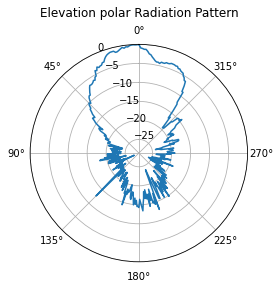

In [39]:
import pandas as pd
import numpy as np

grau2 = list(range(0,361))
normadbm2 = list(range(0,361))
for k in range (0,361):
    grau2[k] = k
    
    if k<step:
        normadbm2[k] = dbm[k]-maxdbm
  
    elif k == step:
        #dbm[k]=dbm[0]
        normadbm2[k] = dbm[0]-maxdbm

        
print(grau2)
import matplotlib.pyplot as plt



fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(np.deg2rad(grau2), normadbm2)
ax.set_theta_offset(np.deg2rad(90))
ax.grid(True)
ax.set_title("Radiation Pattern", va='bottom')
#fig.savefig("Polar_elevation.png")



In [41]:
print(dbm[225],dbm[224],dbm[226],dbm[22])

-79.34 -77.86 -78.51


In [42]:
df1.to_csv('dados.csv')

14.289999999999992
27.312085032838603
-3.23375713700554
-2.74680269581607
45
-3.469999999999999
23
-2.549999999999997
353
31


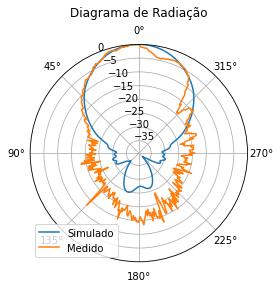

In [1]:
import pandas as pd
import numpy as np
import csv

import csv

import pandas as pd

medicao = list(range(0,361))
data = pd.read_csv('dados.csv')
medido = list(data['Potencia Normalizada [dB]'])

#print(medido)  
    
datasim = pd.read_csv('datasimulacao.csv')
simulado = list(datasim["dB10normalize(RealizedGainTotal) [] - Freq='26GHz' Phi='0deg'"])
#print(simulado)

grau2 = list(range(0,361))
normadbm2 = list(range(0,361))
for k in range (0,361):
    grau2[k] = k
    if k ==360:
        medicao[k] = medido[0]
    if k !=360:
        medicao[k] = medido[k]
    

        
#print(grau2)
import matplotlib.pyplot as plt



fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(np.deg2rad(grau2), simulado)
ax.plot(np.deg2rad(grau2),medicao)
ax.legend({'Simulado','Medido'})
ax.set_theta_offset(np.deg2rad(90))
ax.grid(True)
ax.set_title("Diagrama de Radiação", va='bottom')
#fig.savefig("Polar_elevation.png")


# Relação Frente costas Medido
relacaomedido = medido[0] - medido[180]
print(relacaomedido)


# Relação Frente costas Simulado
relacaosimulado = simulado[0] - simulado[180]
print(relacaosimulado)



# Abertura de Feixe Simulado

for k in range (0,45):  
    if (simulado[k]) <= (-3):
        print(simulado[k])
        angulo1 = (k)
        break

for k in range (315,360):
    
    if simulado[k]>= -3:
        print(simulado[k])
        angulo2 = (k-1)
        break

abertura = angulo1 + 360 - angulo2
print(abertura)


# Abertura de Feixe medido

for k in range (0,45):  
    if (medido[k]) <= (-3):
        print(medido[k])
        angulo1 = (k)
        print(k)
        break

for k in range (315,360):
    
    if medido[k]>= -3:
        print(medido[k])
        angulo2 = (k-1)
        print(k)
        break

abertura = angulo1 + 360 - angulo2
print(abertura)

17.07
27.312085032838603
60
40


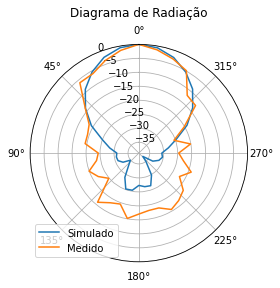

In [2]:
import pandas as pd
import numpy as np
import csv

import csv

import pandas as pd

medicao = list(range(0,37))
data = pd.read_csv('dados_10.csv')
medido = list(data['Potencia Normalizada [dB]'])

#print(medido)  
    
datasim = pd.read_csv('dadossim_10.csv')
simulado = list(datasim["dB10normalize(RealizedGainTotal) [] - Freq='26GHz' Phi='0deg'"])
#print(simulado)

grau2 = list(range(0,37))
normadbm2 = list(range(0,37))
for k in range (0,37):
    grau2[k] = k*10
    if k ==36:
        medicao[k] = medido[0]
    if k !=36:
        medicao[k] = medido[k]
    

        
#print(grau2)
import matplotlib.pyplot as plt



fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(np.deg2rad(grau2), simulado)
ax.plot(np.deg2rad(grau2),medicao)
ax.legend({'Simulado','Medido'})
ax.set_theta_offset(np.deg2rad(90))
ax.grid(True)
ax.set_title("Diagrama de Radiação", va='bottom')
#fig.savefig("Polar_elevation.png")


# Relação Frente costas Medido
relacaomedido = medido[0] - medido[18]
print(relacaomedido)


# Relação Frente costas Simulado
relacaosimulado = simulado[0] - simulado[18]
print(relacaosimulado)


# Abertura de Feixe Simulado

for k in range (0,5):  
    if (simulado[k]) <= (-3):
        #print(simulado[k])
        angulo1 = (k)
        break

for k in range (31,36):
    
    if simulado[k]>= -3:
        #print(simulado[k])
        angulo2 = (k-1)
        break

abertura = 10*angulo1 + 360 - 10*angulo2
print(abertura)


# Abertura de Feixe medido

for k in range (0,5):  
    if (medido[k]) <= (-3):
        #print(medido[k])
        angulo1 = (k)
        #print(k)
        break

for k in range (31,36):
    
    if medido[k]>= -3:
        #print(medido[k])
        angulo2 = (k-1)
        #print(k)
        break

abertura = angulo1*10 + 360 - 10*angulo2
print(abertura)

